# Cas Kaggle ApC

## Participants

Martí Armengod Villar, 1673911 

Joan Marc Samó Rojas, 1679937 

## Base de dades 
La nostra Base de dades que tracta sobre de dades de partides de escacs aqui tenim el enllaç a la web de Kaggle

https://www.kaggle.com/datasets/datasnaek/chess

Hem escollit aquesta base de dades per que hem vist que predint quin jugador guayara ens ajuda a entendre quin tipus de jugades son mes probables que ens donin la victoria o com d'important es la experencia del jugador o altra informació ue podem extreure.

## Objectius

El que volem ser capaços es predir quin jugador guanyara a partir de la seva llençada inicial.

## Pasos a seguir
0. Feina previa
  * Importar dades
1. EDA (exploratory data analysis):
  * Atributs
    - Descripció dels atributs:
    - Informació sobre el nostre 'target'
  * Correlació
  * Balancejades
2. Preprocessing:
  * Detecció de Nans
  * Eliminar Duplicats
  * Normalització de les dades

3. Metric selection:

4. Model Selection amb Crossvalidation:

5. Analisi final


### 0. Feina previa

#### Importar dades
Ara el que farem es importar les nostres dades i fer la separació entre el train i el test per evitar data leakage

In [18]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.svm import SVC
import time

# Importar dades del CSV i separar 
dades = pd.read_csv('games.csv')

train_set, test_set = train_test_split(dades,random_state=42,test_size=0.2)
X_test = test_set.copy()

X_test

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
19390,ECQZchLt,True,1.504113e+12,1.504113e+12,61,resign,white,10+0,erdugliano71,1919,selami011235,1798,d4 f5 Bf4 Nf6 e3 d6 Nc3 Nc6 Bc4 e5 dxe5 dxe5 Q...,A80,Dutch Defense,2
4226,BqMaxwMW,True,1.454940e+12,1.454940e+12,86,mate,black,10+0,djbaseball46,1195,carlosamadorsanchez,1123,e4 e5 Nf3 f5 d3 fxe4 dxe4 Bb4+ Bd2 Bxd2+ Nbxd2...,C40,Latvian Gambit,4
18893,cIP5THAR,True,1.466630e+12,1.466631e+12,27,resign,black,10+2,nitche,1867,jaivl,1932,e4 c5 Nf3 g6 d4 cxd4 Nxd4 Nc6 Nxc6 bxc6 Nc3 Bg...,B34,Sicilian Defense: Accelerated Dragon | Exchan...,9
15231,F4BG9EjO,True,1.503159e+12,1.503160e+12,79,resign,white,10+0,yellow_dragon,1823,silentmove,1770,d4 Nf6 c4 g6 Nc3 Bg7 e4 d6 f3 O-O Be3 e5 d5 c6...,E88,King's Indian Defense: Saemisch Variation | C...,14
13987,lG5mJCIw,True,1.504180e+12,1.504181e+12,37,resign,white,10+0,rhysmc123,1371,gonzorg,1193,e4 e5 d3 Nf6 Bg5 Nc6 Bxf6 gxf6 a3 Qe7 b4 d6 c4...,C20,King's Pawn Game: Leonardis Variation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12136,yib185CP,True,1.497006e+12,1.497006e+12,59,resign,white,10+0,cothraige,1844,noobdude,1589,d4 d5 c4 c6 Nc3 Nf6 cxd5 Nxd5 Nxd5 Qxd5 e3 e5 ...,D10,Slav Defense #2,5
13103,MquSInPb,True,1.502463e+12,1.502463e+12,8,mate,black,10+0,samilou123,1605,ppm,1735,e4 e5 h3 Bc5 a3 Qf6 Ne2 Bxf2#,C20,King's Pawn Game,2
10564,hvFyJb0x,True,1.396441e+12,1.396441e+12,35,mate,white,10+10,vladimir-kramnik-1,1610,thiago5555,1500,e4 e5 Nf3 Nf6 Nxe5 Nxe4 Qe2 Nd6 Nc6+ Be7 Nxd8 ...,C42,Russian Game: Damiano Variation,6
4104,ZUOFdaon,True,1.475420e+12,1.475420e+12,53,mate,white,15+10,om1665061,1184,sofaki23,1269,e4 e5 Nf3 Nc6 Nc3 Nf6 Bc4 Bb4 O-O Bxc3 d3 Ba5 ...,C46,Four Knights Game: Italian Variation,7


In [19]:
#Funcions Generiques que utilitzarem mes endavant 

#Funció per eliminar atributs

def eliminar_atributs(df, columnes_a_eliminar):
    df_sense_atributs = df.drop(columns=columnes_a_eliminar, axis=1)
    return df_sense_atributs

#

### 1. EDA (exploratory data analysis):

Una vegada em tingut el data set a les nostres mans hem estat analitzant quines caracteristiques i atributs tenim per poder veure quin son mes utils i necesaris i quins no.

#### Atributs
La nostre base de dades te 16 atributs (columnes)

Són dels tipus següents:
- **Binaris:** Rated
- **Categòric:** Id, Created_at, Last_move_at, Victory_status, Winner, Increment_code, White_id, Black_id, Moves, Opening_eco, Opening_name
- **Numèrics:** Turns, White_rating, Black_rating, Opening_ply

##### Descripció dels atributs:
- **Id:** Identificador de la partida.
- **Rated:** Qualificació de la partida.
- **Created_at:** Hora de començament.
- **Last_move_at:** Hora de fi.
- **Turns:** Numero de torns que ha durat la partida.
- **Victory_status:** Com ha quedat l'estat de la partida (mate,resign,draw).
- **Winner:** Color guanyador (Será el nostre target).
- **Increment_code:** Temps maxim de la partida.
- **White_id:** Identificador del jugador que fara servir les fitxes blanques.
- **White_rating:** Puntuació que té el jugador que utilitza les blanques.
- **Black_id:** Identificador del jugador que fara servir les fitxes negres.
- **Black_rating:** Puntuació que té el jugador que utilitza les negres.
- **Moves:** Movimnets que es relalitzen durant la partida.
- **Opening_eco:** Primer moviment d'obertura.
- **Opening_name:** Nom de la jugada inicial.
- **Opening_ply:** Numero de moviments per realitzar l'obertura.

##### Informació sobre el nostre 'target'

És l'atribut Winner que es del tipus Categoric ja que tenim tres possibles opcions, que serien White, Black o Draw (Empat).

També hem de comentar que la nostra base de dades no conté nans.


In [20]:
tipus_atributs = train_set.info()
print(tipus_atributs)


<class 'pandas.core.frame.DataFrame'>
Index: 16046 entries, 10387 to 15795
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              16046 non-null  object 
 1   rated           16046 non-null  bool   
 2   created_at      16046 non-null  float64
 3   last_move_at    16046 non-null  float64
 4   turns           16046 non-null  int64  
 5   victory_status  16046 non-null  object 
 6   winner          16046 non-null  object 
 7   increment_code  16046 non-null  object 
 8   white_id        16046 non-null  object 
 9   white_rating    16046 non-null  int64  
 10  black_id        16046 non-null  object 
 11  black_rating    16046 non-null  int64  
 12  moves           16046 non-null  object 
 13  opening_eco     16046 non-null  object 
 14  opening_name    16046 non-null  object 
 15  opening_ply     16046 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.0+ MB
None


#### Correlació
Hem pogut observat que tenim alguna correlació entre atributs,

- Els atributs de opening_eco, opening_name i opening_ply estan molt relacionats, ja que depenen del tipus de moviment inicial que realitzi sera un nom de obertura amb uns moviments definits. La correlació sera molt més alta entre el opening_name i el opening_ply ja que per cada tipus de obertura te un numero predefinit de moviments inicials ja que si fos diferent ja seria una altre obertura.

Si mirem exactament correlacións entre la X i y podem observar el següent,

NO ESTIC SEGUR
- Que sense arreglar una mica les dades es imposible de veuren directament.

#### Balancejades
Observem els seguents desbalancetjos en les següents dades:
- Tenim un 84 % de dades de partides correctes i un 16% de partides incorrectes.
- Tenim un 56% de resign i un 32% de mate en estats de victoria
- Tenim un 50% de vegades en les que ha guanyat el jugador de les fitxes blanques i un 45% que ha guanyat el jugador amb les fitxes negres.

**Conclusió:** 

El desbalanceig en les etiquetes pot provocar un rendiment deficient en la classe minoritària, fent que el model prefereixi la classe majoritària i augmenti la taxa de falsos negatius. Això pot resultar en mètriques enganyoses.

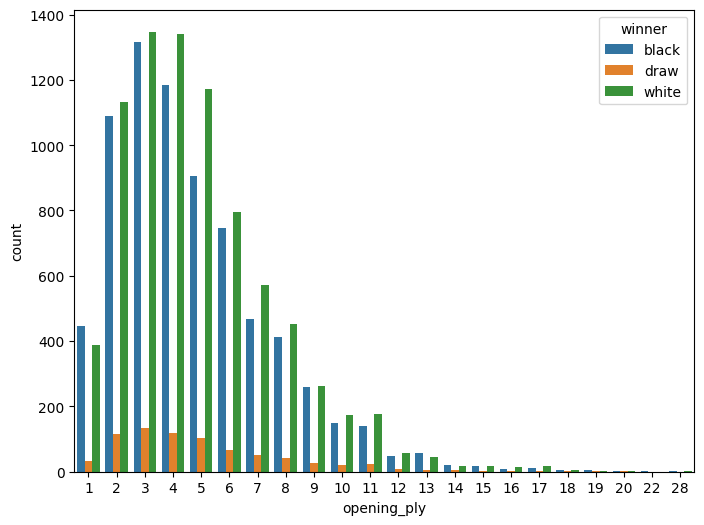

In [21]:
sns.countplot(data=train_set, x='opening_ply', hue='winner')
plt.show()

### 2. Preprocessing:
Ara un cop que ja hem observat les dades amb les que tenim que tractar começarem mirant Si tenim nans, analitzant si s'han de normalitzar atributs, i decidint amb quins atributs ens hauriem de quedar.

#### Detecció de Nans
Hem volgut assegurar-nos de si les nostres dades tenien o no Nans i tal i com haviem observat en la web del Kaggle no en tenim. Ho podem observar en la següent funcio de comprovacio de Nans, Cap columna te cap Nan.

In [22]:
nans = train_set.isna().sum()

print(nans)

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64


#### Eliminar Duplicats
També ens hem donat compte que tenim files identiques repetides multiples vegades aixi que avanç de res el que farem es eliminar les repeticons asegurant-nos de eliminar nomes les que son 100% iguals.

In [23]:
# Elimina files duplicades completament iguals

print(f"Train Abans de treure duplicats: {train_set.shape[0]} files")
print(f"Test Abans de treure duplicats: {X_test.shape[0]} files")

train_set = train_set.drop_duplicates()
X_test = X_test.drop_duplicates()

print()
print(f"Train Després de treure duplicats: {train_set.shape[0]} files")
print(f"Test Després de treure duplicats: {X_test.shape[0]} files")


Train Abans de treure duplicats: 16046 files
Test Abans de treure duplicats: 4012 files

Train Després de treure duplicats: 15761 files
Test Després de treure duplicats: 3991 files


#### Normalització de les dades
Ara el que fem és analitzar els atribuits que tenim i quins creiem que s'haurien d'eliminar i els que ens quedem si els hem de normalitzar com ho fariem.


- **Victory_status**
    - **Tipus de Codificació**: Label Encoding
    - El farem es pasar l'estat de ña partida que en son 4 (resign,draw,mate,outoftime) per numeros per poder-los tractar molt millor.
- **Increment_code**
    - **Tipus de Codificació**: Label Encoding
    - Aqui l'unic que farem és retallar la part final del numero que esta darrera de + ja que compte els temps extres que no ens interesa.
- **White_rating**
    - **Tipus de Codificació**: Label Encoding
    - Podem resumir els punts en 6 categories que dependra del valor de puntuació  apartir de 1100 anirem pujant la categoria creant del 1 al 6 per tal de saber el nivell del jugador.
- **Black_rating**
    - **Tipus de Codificació**: Label Encoding
    - Podem resumir els punts en 6 categories que dependra del valor de puntuació  apartir de 1100 anirem pujant la categoria creant del 1 al 6 per tal de saber el nivell del jugador.



In [24]:
from sklearn.calibration import LabelEncoder

#PREPROCESSING

train_set['victory_status'] = LabelEncoder().fit_transform(train_set['victory_status'])
X_test['victory_status'] = LabelEncoder().fit_transform(X_test['victory_status'])


train_set['increment_code'] = train_set['increment_code'].str.split('+').str[0]
X_test['increment_code'] = X_test['increment_code'].str.split('+').str[0]

#---------------------------------------------------------------------------------------------------------------------------------------------------------

train_set['created_at'] = pd.to_datetime(train_set['created_at'], unit='ms')
train_set['last_move_at'] = pd.to_datetime(train_set['last_move_at'], unit='ms')

X_test['created_at'] = pd.to_datetime(X_test['created_at'], unit='ms')
X_test['last_move_at'] = pd.to_datetime(X_test['last_move_at'], unit='ms')

#---------------------------------------------------------------------------------------------------------------------------------------------------------
# Definir intervals i etiquetes
bins = [0, 1100, 1600, 2000, 2300, 3000, float('inf')]
labels = [1, 2, 3, 4, 5, 6]

# Aplicar a 'white_rating' i 'black_rating'
train_set['white_level'] = pd.cut(train_set['white_rating'], bins=bins, labels=labels, right=False).astype(int)
train_set['black_level'] = pd.cut(train_set['black_rating'], bins=bins, labels=labels, right=False).astype(int)

X_test['white_level'] = pd.cut(X_test['white_rating'], bins=bins, labels=labels, right=False).astype(int)
X_test['black_level'] = pd.cut(X_test['black_rating'], bins=bins, labels=labels, right=False).astype(int)

# Verificar distribucions
print(train_set['white_level'].value_counts())
print(train_set['black_level'].value_counts())


#---------------------------------------------------------------------------------------------------------------------------------------------------------
'''quallist=[]  
def total(a,b):
    qual= a+b
    qual_int=int()
    if qual<=3:
        qual_int=1
    elif 3<qual<=5:
        qual_int=2
    elif 5<qual<=7:
        qual_int=3
    elif 7<qual<=10:
        qual_int=4
    quallist.append(qual_int)

# use apply for interact with dataframe's multiple columns 
train_set['match_quality'] = train_set.apply(lambda x: total(x["white_level"], x["black_level"]), axis=1) 
X_test['match_quality'] = X_test.apply(lambda x: total(x["white_level"], x["black_level"]), axis=1) '''

#---------------------------------------------------------------------------------------------------------------------------------------------------------

# Crear un LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a la columna 'winner'
train_set['winner_numeric'] = label_encoder.fit_transform(train_set['winner'])

# Veure el mapping de valors
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Per fer el mateix amb el conjunt de test:
X_test['winner_numeric'] = label_encoder.transform(X_test['winner'])
train_set

white_level
2    8012
3    5798
4    1229
1     545
5     177
Name: count, dtype: int64
black_level
2    8070
3    5698
4    1256
1     589
5     148
Name: count, dtype: int64
{'black': np.int64(0), 'draw': np.int64(1), 'white': np.int64(2)}


C:\Users\Marti\AppData\Local\Temp\ipykernel_19348\1584465981.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['victory_status'] = LabelEncoder().fit_transform(X_test['victory_status'])
C:\Users\Marti\AppData\Local\Temp\ipykernel_19348\1584465981.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['increment_code'] = X_test['increment_code'].str.split('+').str[0]
C:\Users\Marti\AppData\Local\Temp\ipykernel_19348\1584465981.py:17: SettingWithCopyWarning: 
A value is trying to be set on a cop

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,white_level,black_level,winner_numeric
10387,CD7r0fsT,True,2014-05-13 17:16:44.729,2014-05-13 17:26:06.045,57,3,white,10,gintokichimaru,1480,ro74cky,1393,d4 d5 e4 e6 e5 c5 c3 c4 Nf3 h6 Be2 b5 Na3 b4 Q...,C02,French Defense: Advance Variation #2,7,2,2,2
6077,sPBuKOpj,True,2016-07-18 16:40:00.000,2016-07-18 16:40:00.000,22,3,black,10,adictochesser,1963,rohanms,1380,e4 b6 Nf3 Bb7 Nc3 Na6 Bc4 e6 O-O Nc5 Re1 Nf6 d...,B00,Owen Defense,2,3,2,0
3379,HvgVmeCS,True,2016-12-27 03:40:00.000,2016-12-27 03:40:00.000,53,2,white,12,evlogy,1888,mailsupriya,1831,e4 c5 f4 Nc6 Nf3 d6 Bb5 Bd7 Bxc6 Bxc6 d3 e6 O-...,B21,Sicilian Defense: McDonnell Attack,3,3,3,2
2635,spJok9YP,True,2017-06-17 20:06:40.000,2017-06-17 20:06:40.000,58,1,black,15,miksu0,1400,scorchedturf,1451,e4 c5 c3 e6 d3 d5 Nd2 dxe4 Nxe4 Nf6 Be3 b6 Nf3...,B22,Sicilian Defense: Alapin Variation,3,2,2,0
10548,iOFAKFSf,True,2014-04-09 16:47:27.698,2014-04-09 16:56:13.672,59,3,white,15,vladimir-kramnik-1,1610,rroig,1617,e4 e6 d4 d5 e5 c5 c3 cxd4 cxd4 a6 Nf3 Ne7 Nc3 ...,C02,French Defense: Advance Variation #2,7,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,onOXtg8y,True,2016-02-10 13:13:20.000,2016-02-10 13:13:20.000,23,1,white,5,saitama_opm,1559,chairman,1577,d4 d5 e3 e6 Nf3 c5 Be2 c4 b3 b5 a4 b4 bxc4 dxc...,D00,Queen's Pawn Game #2,3,2,2,2
11284,bhMDeuOb,True,2014-05-13 20:26:18.264,2014-05-13 20:51:34.099,24,2,black,20,alliekatxoxo1,1061,sjamal99,1133,e4 e5 d3 Qf6 f3 Bc5 a3 Nh6 Ne2 O-O Nd2 Ng4 Nc4...,C20,King's Pawn Game: Leonardis Variation,3,1,2,0
5390,h7WPr0QV,False,2017-08-18 21:00:00.000,2017-08-18 21:00:00.000,45,3,white,20,kryptik,1530,dadams7,1503,d4 d5 c4 e6 e3 Nf6 Nf3 Bd6 c5 Be7 g3 O-O Bg2 c...,D30,Queen's Gambit Declined,4,2,2,2
860,WHRdaJm2,True,2017-07-27 10:06:40.000,2017-07-27 10:06:40.000,52,3,black,10,ducksandcats,1851,wall-of-shields,1679,e4 d6 d4 f5 Bd3 fxe4 Bxe4 e6 Qh5+ Ke7 Nf3 Nf6 ...,B07,Rat Defense: Balogh Defense,4,3,3,0


#### Eliminar Atributs
Hem de tenir en compte que tenim columnes com per exemple la id de la partida que no ens aporta cap dada rellevant ja que es unica per cada partida i no podriem obtenir informació d'ella.

Ara el farem es veure quines columnes són les que necesitem per poder predir el que volem saber que és qui guanyara segons els primers moviments.
- **Id**
    - **Decisió**: Eliminar
    - Aquest atribut es considera no rellevant per a la predicció de quin color guanyara ja que es el identificador de partida.
- **Created_at**
    - **Decisió**: Eliminar
    - Aquest atribut es considera no rellevant per a la predicció de quin color guanyara ja que es l'hora de començament.
- **Last_move_ad**
    - **Decisió**: Eliminar
    - Aquest atribut es considera no rellevant per a la predicció de quin color guanyara ja que es l'hora de finalització.
- **White_id**
    - **Decisió**: Eliminar
    - Aquest atribut es considera no rellevant per a la predicció de quin color guanyara ja que és l'identificador del jugador que fara servir les fitxes blanques.
- **Black_id**
    - **Decisió**: Eliminar
    - Aquest atribut es considera no rellevant per a la predicció de quin color guanyara ja que és l'identificador del jugador que fara servir les fitxes negres.   
- **Move**
    - **Decisió**: Eliminar
    - Aquest atribut es considera no rellevant per a la predicció de quin color guanyara ja que són tots els movimnets que es relalitzen durant la partida i són practicament unics.
- **Opening_name**
    - **Decisió**: Eliminar
    - Aquest atribut es considera no rellevant per a la predicció de quin color guanyara ja que són els noms de les jugades inicials.




In [25]:
train_set = train_set.drop(columns=["created_at","last_move_at"])
train_set = train_set.drop_duplicates()

#print(dades_sense_columna)
print(f"Despres de treure duplicats: {train_set.shape[0]} files")

# Seleccionar totes les files amb id XXXX
id_seleccionat = "XRuQPSzH"
files_seleccionades = train_set[train_set["id"] == id_seleccionat]
print(files_seleccionades)

train_set = eliminar_atributs(train_set,["id","white_id","black_id","white_id","moves","opening_name"])
train_set

Despres de treure duplicats: 15432 files
           id  rated  turns  victory_status winner increment_code  \
950  XRuQPSzH   True     50               3  black             10   

        white_id  white_rating black_id  black_rating  \
950  chess-brahs          2036     cdvh          1706   

                                                 moves opening_eco  \
950  Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...         A08   

                               opening_name  opening_ply  white_level  \
950  King's Indian Attack: French Variation            6            4   

     black_level  winner_numeric  
950            3               0  


,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,white_level,black_level,winner_numeric
10387,True,57,3,white,10,1480,1393,C02,7,2,2,2
6077,True,22,3,black,10,1963,1380,B00,2,3,2,0
3379,True,53,2,white,12,1888,1831,B21,3,3,3,2
2635,True,58,1,black,15,1400,1451,B22,3,2,2,0
10548,True,59,3,white,15,1610,1617,C02,7,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,True,23,1,white,5,1559,1577,D00,3,2,2,2
11284,True,24,2,black,20,1061,1133,C20,3,1,2,0
5390,False,45,3,white,20,1530,1503,D30,4,2,2,2
860,True,52,3,black,10,1851,1679,B07,4,3,3,0


<Axes: >

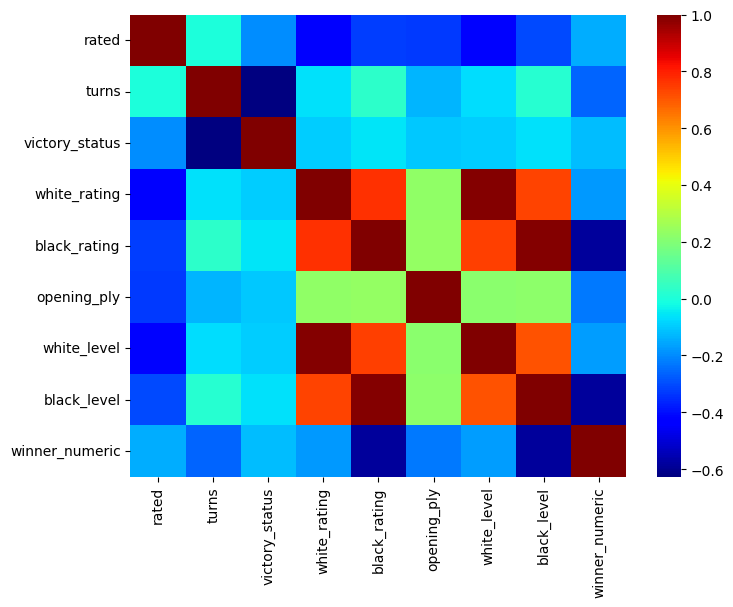

In [26]:
corr = train_set.corr(numeric_only=True) # take only numeric columns 
sns.heatmap(corr.corr(), annot=False, cmap='jet') # heatmap with numerical columns

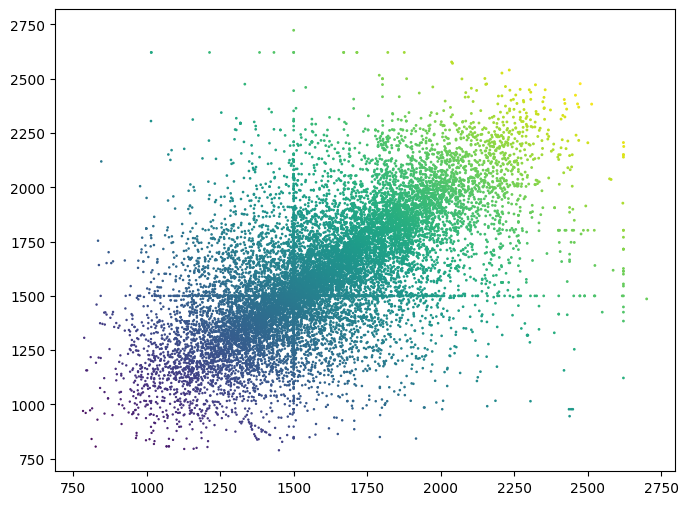

In [27]:
black_rating= train_set["black_rating"]
white_rating=  train_set["white_rating"]

plt.scatter(white_rating,black_rating,s=((black_rating+white_rating)//2)*0.0005,c=((black_rating+white_rating)//2)*0.0005) 
plt.rcParams["figure.figsize"] = (8,6) # execute this cell 2 times because it is not updating in first time

### Metric selection:

Les millors metriques en aquest cas son les següents:

- Precission: volem saber si una apertura guanyadora ho es amb certessa, no ens interessa tenir un gran nombre d'opcions igulment valides sinó tenir clar quines ho són realment.

- Accuracy 


In [76]:
def plot_roc_curve_mc(y_true, y_pred_prob):
    classes = np.unique(y_true)
    
    plt.figure()

    for c in classes:
        y_true_c = y_true == c

        fpr, tpr, thresholds = roc_curve(y_true_c, y_pred_prob[:,c])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label='ROC curve ' + str(c) + ' (area = %0.2f)' % roc_auc)

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve_mc(y_true, y_pred_prob):
    classes = np.unique(y_true)
    
    plt.figure()

    for c in classes:
        y_true_c = (y_true == c).astype(int)

        precision, recall, thresholds = precision_recall_curve(y_true_c, y_pred_prob[:,c])
        average_precision = auc(recall, precision)

        plt.plot(recall, precision, lw=2, label='Precision-Recall curve ' + str(c) + ' (area = %0.2f)' % average_precision)
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

def evaluate_prediction(y_test, y_pred_prob):
    #transformem probabilitat en certesa
    y_pred = np.argmax(y_pred_prob, axis=1)

    #Mostrem matriu de confusio
    print(confusion_matrix(y_test, y_pred))
    
    #Mostrem dades generals
    print(classification_report(y_test, y_pred))

    #mostrem cuves roc i pr
    plot_roc_curve_mc(y_test, y_pred_prob)
    plot_precision_recall_curve_mc(y_test, y_pred_prob)

def evaluate_model(model, X_train, y_train):
    #fem crossvalidation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    print(mean_score)
    

### Model Selection amb Crossvalidation:



In [107]:
train, test = train_test_split(train_set.drop(columns=["winner", "opening_eco"]), random_state=42, test_size=0.2)
X_train = train.drop(columns=['winner_numeric'])
y_train = train['winner_numeric']
X_test = test.drop(columns=['winner_numeric'])
y_test = test['winner_numeric']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

lr_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg']
}

rf_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

knn_grid = {
    'n_neighbors': [2, 5, 7, 10, 15, 22, 30],
    'weights': ['uniform', 'distance']
}

svm_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

lr = LogisticRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC(probability=True)



In [ ]:
def find_hiperparam(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)


find_hiperparam(lr, lr_grid, X_train, y_train)
#find_hiperparam(rf, rf_grid)
#find_hiperparam(knn, knn_grid)
#find_hiperparam(svm, svm_grid)

c:\Users\Marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self.

{'C': 0.01, 'solver': 'liblinear'}


0.6580801944106927
[[ 798    0  649]
 [   7  118    4]
 [ 360    1 1150]]
              precision    recall  f1-score   support

           0       0.68      0.55      0.61      1447
           1       0.99      0.91      0.95       129
           2       0.64      0.76      0.69      1511

    accuracy                           0.67      3087
   macro avg       0.77      0.74      0.75      3087
weighted avg       0.67      0.67      0.67      3087



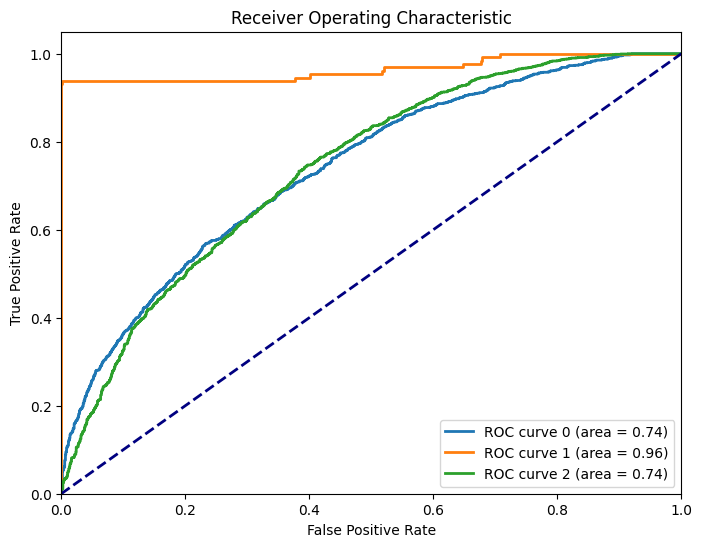

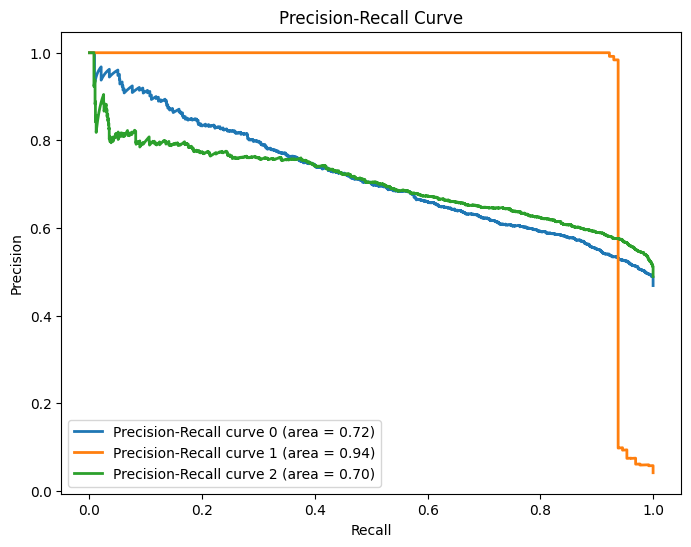

In [ ]:
def fit_model(model, param_grid, X_train, y_train, X_test, y_test):
    find_hiperparam(model, param_grid)

    evaluate_model(model, X_train, y_train)

    model.fit(X_train, y_train)

    y_pred_prob = model.predict_proba(X_test)

    evaluate_prediction(y_test, y_pred_prob)





#fit_model(lr, lr_grid, X_train, y_train, X_test, y_test)
#fit_model(rf, rf_grid, X_train, y_train, X_test, y_test)
#fit_model(knn, knn_grid, X_train, y_train, X_test, y_test)
fit_model(svm, svm_grid, X_train, y_train, X_test, y_test)


### Analisi final

